## ARIMA and Seasonal ARIMA
### Autoregressive Integrated Moving Averages


The general process for ARIMA models is the following:
- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model or Seasonal ARIMA based on the data
- Use the model to make predictions

## Loading the Data 

In [102]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
df = pd.read_csv('large retail2.csv')

In [104]:
df.head()

,Unnamed: 0,CUST_ID,CUST_DOB,GENDER,MARITAL_STATUS,INVOICE_ID,INVOICE_DATE,CARD_JOIN_DATE,PROD_ID,PROD_PRICE
0,5000000,CID020818,1987-10-04,M,unmarried,IN4531329,2017-09-20,2010-03-13,AD073,70
1,5000001,CID020818,1987-10-04,M,unmarried,IN4808513,2017-11-20,2010-03-13,AD073,70
2,5000002,CID020819,1978-08-15,F,married,IN0279560,2015-03-03,2009-11-13,AD073,70
3,5000003,CID020820,1969-10-03,F,married,IN0782107,2015-06-21,2009-07-04,AD073,70
4,5000004,CID020820,1969-10-03,F,married,IN3498542,2017-02-05,2009-07-04,AD073,70


Dropping the columns which is not neccesary/important for time series analysis

In [105]:
df.drop(['Unnamed: 0', 'CUST_ID','CUST_DOB','GENDER','MARITAL_STATUS','INVOICE_ID','CARD_JOIN_DATE','PROD_ID',
       ], axis='columns', inplace=True)

changing the date string formate into python date formate

In [107]:
df['INVOICE_DATE']=pd.to_datetime(df['INVOICE_DATE'])

In [108]:
df.set_index('INVOICE_DATE',inplace=True)

Group by the total sale revenue by day for further analysis

In [109]:
df['total_revenue'] = df.groupby("INVOICE_DATE")["PROD_PRICE"].sum()

In [110]:
df.head()

,PROD_PRICE,total_revenue
INVOICE_DATE,,
2017-09-20,70,843477
2017-11-20,70,855536
2015-03-03,70,882020
2015-06-21,70,856354
2017-02-05,70,829361


In [111]:
df.tail()

,PROD_PRICE,total_revenue
INVOICE_DATE,,
2017-08-09,209,879695
2015-03-18,209,882748
2015-12-22,209,835243
2015-01-13,209,859367
2016-04-02,209,840474


In [112]:
df.shape

(5000000, 2)

In [113]:
df['total_revenue'] = df.groupby("INVOICE_DATE")["PROD_PRICE"].sum()

In [114]:
df.head()

,PROD_PRICE,total_revenue
INVOICE_DATE,,
2017-09-20,70,843477
2017-11-20,70,855536
2015-03-03,70,882020
2015-06-21,70,856354
2017-02-05,70,829361


In [115]:
df1 = df.drop_duplicates(subset=["total_revenue"])
df1

,PROD_PRICE,total_revenue
INVOICE_DATE,,
2017-09-20,70,843477
2017-11-20,70,855536
2015-03-03,70,882020
2015-06-21,70,856354
2017-02-05,70,829361
...,...,...
2017-07-28,70,855236
2016-03-11,70,836605
2017-11-11,70,857890


In [ ]:
#df1.to_csv('time_SERIES.csv', index=False)

In [116]:
df1.head()

,PROD_PRICE,total_revenue
INVOICE_DATE,,
2017-09-20,70,843477
2017-11-20,70,855536
2015-03-03,70,882020
2015-06-21,70,856354
2017-02-05,70,829361


In [117]:
df1.tail()

,PROD_PRICE,total_revenue
INVOICE_DATE,,
2017-07-28,70,855236
2016-03-11,70,836605
2017-11-11,70,857890
2015-11-25,70,825776
2015-05-03,70,848932


In [118]:
df1.drop(['PROD_PRICE'], axis='columns', inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [119]:
df1.head()

,total_revenue
INVOICE_DATE,
2017-09-20,843477
2017-11-20,855536
2015-03-03,882020
2015-06-21,856354
2017-02-05,829361


### Visualisation Of data for Time Series 

<AxesSubplot:xlabel='INVOICE_DATE'>

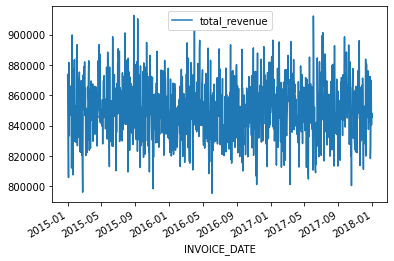

In [120]:
df1.plot()

In [121]:
from statsmodels.tsa.stattools import adfuller


In [122]:
test_result=adfuller(df1['total_revenue'])

In [123]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [124]:
adfuller_test(df1['total_revenue'])

ADF Test Statistic : -32.9288993833265
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1087
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [136]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
#Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

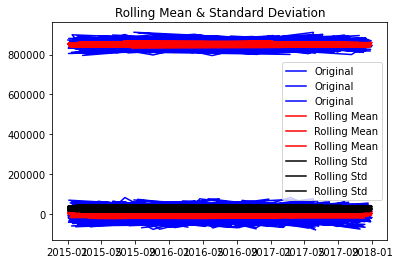

In [137]:
test_stationarity(df1)

### Differencing

In [152]:
df1['Sales First Difference'] = df1['total_revenue'] - df1['total_revenue'].shift(1)

<ipython-input-152-e98e84df0d79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sales First Difference'] = df1['total_revenue'] - df1['total_revenue'].shift(1)


In [153]:
df1['total_revenue'].shift(1)

INVOICE_DATE
2017-09-20         NaN
2017-11-20    843477.0
2015-03-03    855536.0
2015-06-21    882020.0
2017-02-05    856354.0
                ...   
2017-07-28    838776.0
2016-03-11    855236.0
2017-11-11    836605.0
2015-11-25    857890.0
2015-05-03    825776.0
Name: total_revenue, Length: 1088, dtype: float64

<AxesSubplot:xlabel='INVOICE_DATE'>

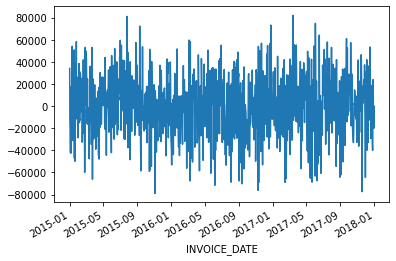

In [154]:
df1['Sales First Difference'].plot()

In [155]:
df1['Seasonal First Difference']=df1['total_revenue']-df1['total_revenue'].shift(12)

<ipython-input-155-5dd477ef582a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Seasonal First Difference']=df1['total_revenue']-df1['total_revenue'].shift(12)


In [156]:
df1.head(14)

,total_revenue,Sales First Difference,Seasonal First Difference
INVOICE_DATE,,,
2017-09-20,843477,NaN,NaN
2017-11-20,855536,12059.0,NaN
2015-03-03,882020,26484.0,NaN
2015-06-21,856354,-25666.0,NaN
2017-02-05,829361,-26993.0,NaN
2016-05-26,830846,1485.0,NaN
2016-11-16,858089,27243.0,NaN
2017-11-17,865421,7332.0,NaN
2017-01-04,885562,20141.0,NaN


In [157]:
adfuller_test(df1['Seasonal First Difference'].dropna())

ADF Test Statistic : -15.8835933085939
p-value : 8.701336203057154e-29
#Lags Used : 11
Number of Observations Used : 1064
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='INVOICE_DATE'>

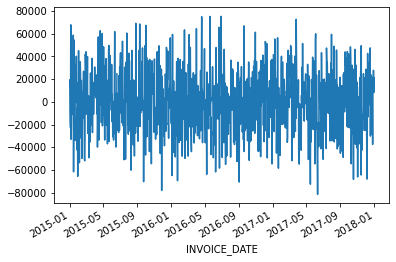

In [158]:
df1['Seasonal First Difference'].plot()

## Modeling

### Auto-Regression Model 

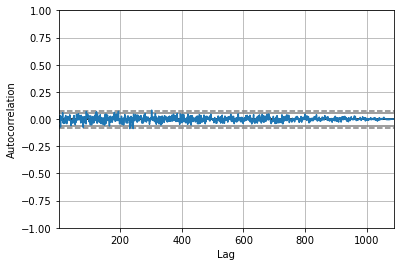

In [159]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['total_revenue'])
plt.show()

In [160]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

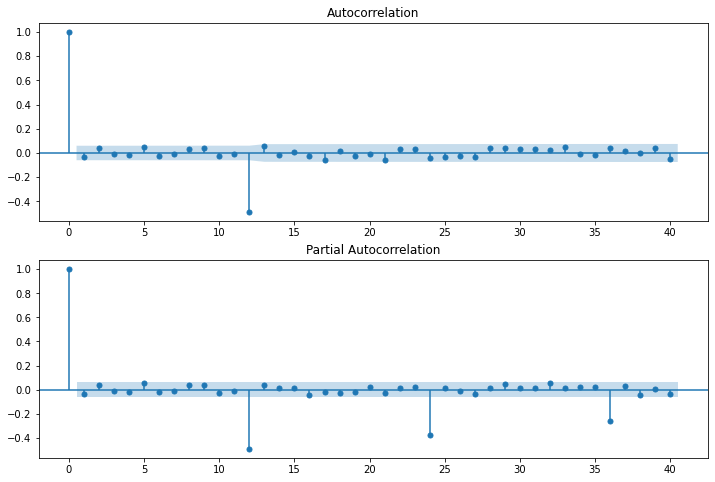

In [161]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [162]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [163]:
model=ARIMA(df1['total_revenue'],order=(1,1,1))
model_fit=model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<ipython-input-164-726f66e83417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)


<AxesSubplot:xlabel='INVOICE_DATE'>

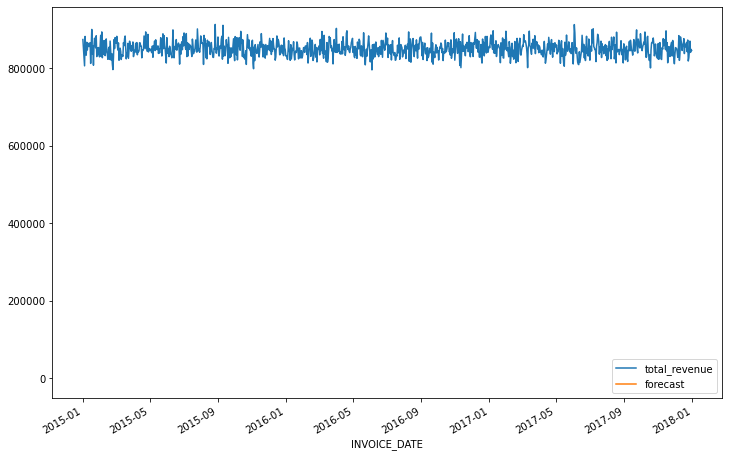

In [164]:
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['total_revenue','forecast']].plot(figsize=(12,8))

## SARIMAX
### As we have observe that the data is having seasionality into it, so we will be using SARIMAX for forecasting

In [165]:
model=sm.tsa.statespace.SARIMAX(df1['total_revenue'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

<ipython-input-166-252c4deecf5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast']=results.predict(start=90,end=103,dynamic=True)


<AxesSubplot:xlabel='INVOICE_DATE'>

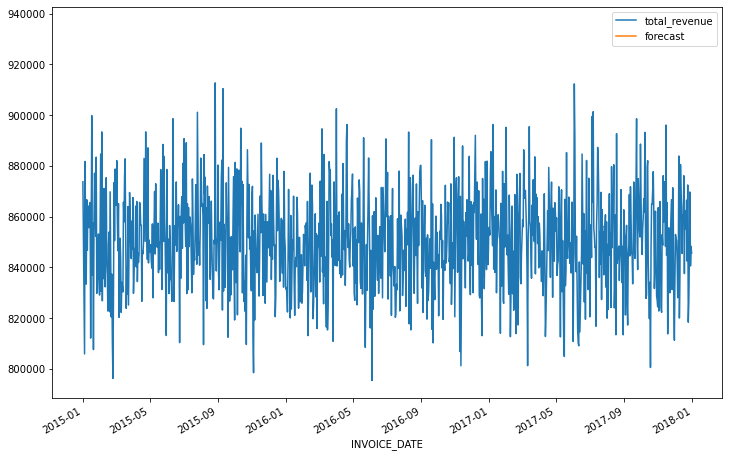

In [166]:
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['total_revenue','forecast']].plot(figsize=(12,8))

In [167]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [168]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [169]:
future_datest_df.tail()

,total_revenue,Sales First Difference,Seasonal First Difference,forecast
2016-12-03,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN
2017-02-03,NaN,NaN,NaN,NaN
2017-03-03,NaN,NaN,NaN,NaN
2017-04-03,NaN,NaN,NaN,NaN


In [170]:
future_df=pd.concat([df1,future_datest_df])

<AxesSubplot:>

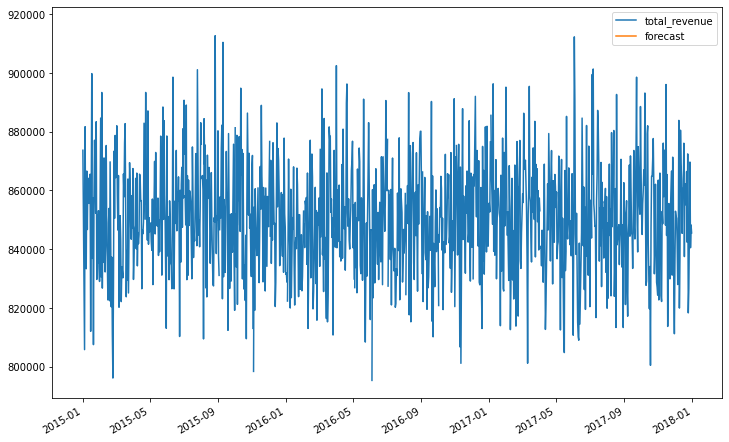

In [171]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= False)  
future_df[['total_revenue', 'forecast']].plot(figsize=(12, 8))